#### Import lib

In [9]:
import matplotlib.pyplot as plt
import pydicom
import glob
from PIL import Image

#### Read pixel data & export img

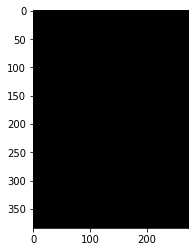

In [4]:
pixel_data = []
paths = glob.glob("./dicoms/*.dcm")
# fig, ax = plt.subplots(384 ,1, figsize=(800,800))
i=0
for path in paths:
    dataset = pydicom.dcmread(path)
    plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
    plt.savefig("./img_seq/{}.png".format(i))
    pixel_data.append(dataset.pixel_array)
    # img = dataset.pixel_array
    i+=1

#### Put img sequences in gif

In [5]:
images = []

for n in range(len(paths)):
    frame = Image.open("./img_seq/{}.png".format(n))
    images.append(frame)

# Save the frames as an animated GIF
images[0].save('brainmri.gif',
               save_all=True,
               append_images=images[1:],
               duration=50,
               loop=0)